# Epilepsy, real data, channel selection

real data, channel selection

In [1]:
# real data, epilepsy, ECoG exam
# https://openneuro.org/datasets/ds003029/versions/1.0.6

In [2]:
import os
import mne
import matplotlib.pyplot as plt
import numpy as np

Choose which patient to load

In [3]:
patientID = 1

In [4]:

prefixpath = 'dataset/ds003029'

patient_prefix = 'sub-pt2'

datasetpath = f'{prefixpath}/{patient_prefix}/ses-presurgery/ieeg'
vhdr_file = os.path.join(f'{datasetpath}/{patient_prefix}_ses-presurgery_task-ictal_acq-ecog_run-01_ieeg.vhdr') 
eeg_file = os.path.join(f'{datasetpath}/{patient_prefix}_ses-presurgery_task-ictal_acq-ecog_run-01_ieeg.eeg') 


# Load EcoG data using MNE
raw = mne.io.read_raw_brainvision(vhdr_file, preload=True)


eeg_data = raw.get_data()  # Shape: (n_channels, n_samples)
n_channels = eeg_data.shape[0]
num_samples = eeg_data.shape[1]
sampling_rate = int(raw.info['sfreq'])
times = raw.times
channel_names = raw.ch_names

total_duration = num_samples / sampling_rate
print(total_duration)

Extracting parameters from dataset/ds003029/sub-pt2/ses-presurgery/ieeg/sub-pt2_ses-presurgery_task-ictal_acq-ecog_run-01_ieeg.vhdr...
Setting channel info structure...
Reading 0 ... 313110  =      0.000 ...   313.110 secs...
313.111


In [5]:
# Print the list of ALL channels' names and their numeric labels
# print("Channel Names and Numeric Labels:")
# for idx, name in enumerate(raw.ch_names):
#     print(f"Channel {idx}: {name}")

In [6]:
# Selected Channels of Interest
channels_of_interest = list(range(33, 37)) + list(range(42, 44)) + list(range(48, 52)) + list(range(52, 56)) + list(range(66, 68))

In [7]:
# Print the names of the selected channels
for ch_index in channels_of_interest:
   print(f'Channel {ch_index + 1}: {channel_names[ch_index]}')

Channel 34: TT1
Channel 35: TT2
Channel 36: TT3
Channel 37: TT4
Channel 43: TT5
Channel 44: TT6
Channel 49: MST1
Channel 50: MST2
Channel 51: MST3
Channel 52: MST4
Channel 53: PST1
Channel 54: PST2
Channel 55: PST3
Channel 56: PST4
Channel 67: AST1
Channel 68: AST2


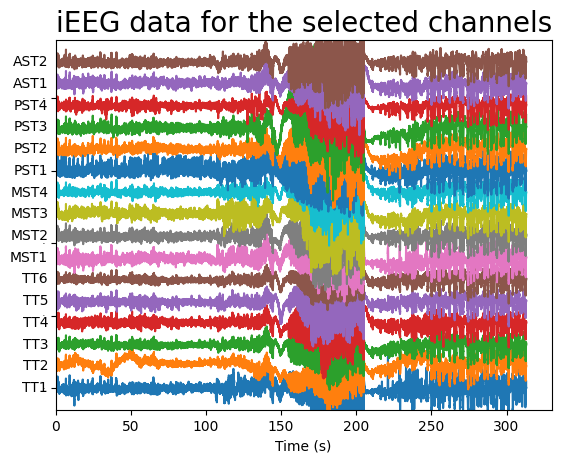

In [8]:

# Increase the offset for spacing
spacing = 30e-4  # Space between channels
for i, channel_idx in enumerate(channels_of_interest):
    # print(channel_idx)
    plt.plot(times, eeg_data[channel_idx] + i * spacing)  # Offset each channel
    # Add text annotations for channel names on the left
    plt.text(-5, i * spacing, channel_names[channel_idx], fontsize=10, verticalalignment='center', horizontalalignment='right')

# Set plot properties
plt.title('iEEG data for the selected channels', fontsize=20)
plt.xlabel('Time (s)', fontsize=10)
plt.xlim(0, 330) 
plt.ylim(-spacing, len(channels_of_interest) * spacing)  

plt.xticks(fontsize=10)
plt.yticks(fontsize=0)  



plt.savefig('output/iEEG_data_selected_few_pat3.pdf')
plt.show()


In [9]:
# export .txt for each channel

output_dir = "channels_for_sonification/"
os.makedirs(output_dir, exist_ok=True)

for ch_idx in channels_of_interest:
    
    data_to_save = np.column_stack((times, eeg_data[ch_idx]))

    
    # Save Dataset
    file_path = os.path.join(output_dir, f"{channel_names[ch_idx]}_no_first.txt")

    np.savetxt(file_path, data_to_save, fmt="%.6f", delimiter="\t", comments="")

print(f"Time series for selected channels saved in '{output_dir}' directory.")

Time series for selected channels saved in 'channels_for_sonification/' directory.
